In [23]:
import  tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPooling2D,UpSampling2D,Reshape,Flatten,BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


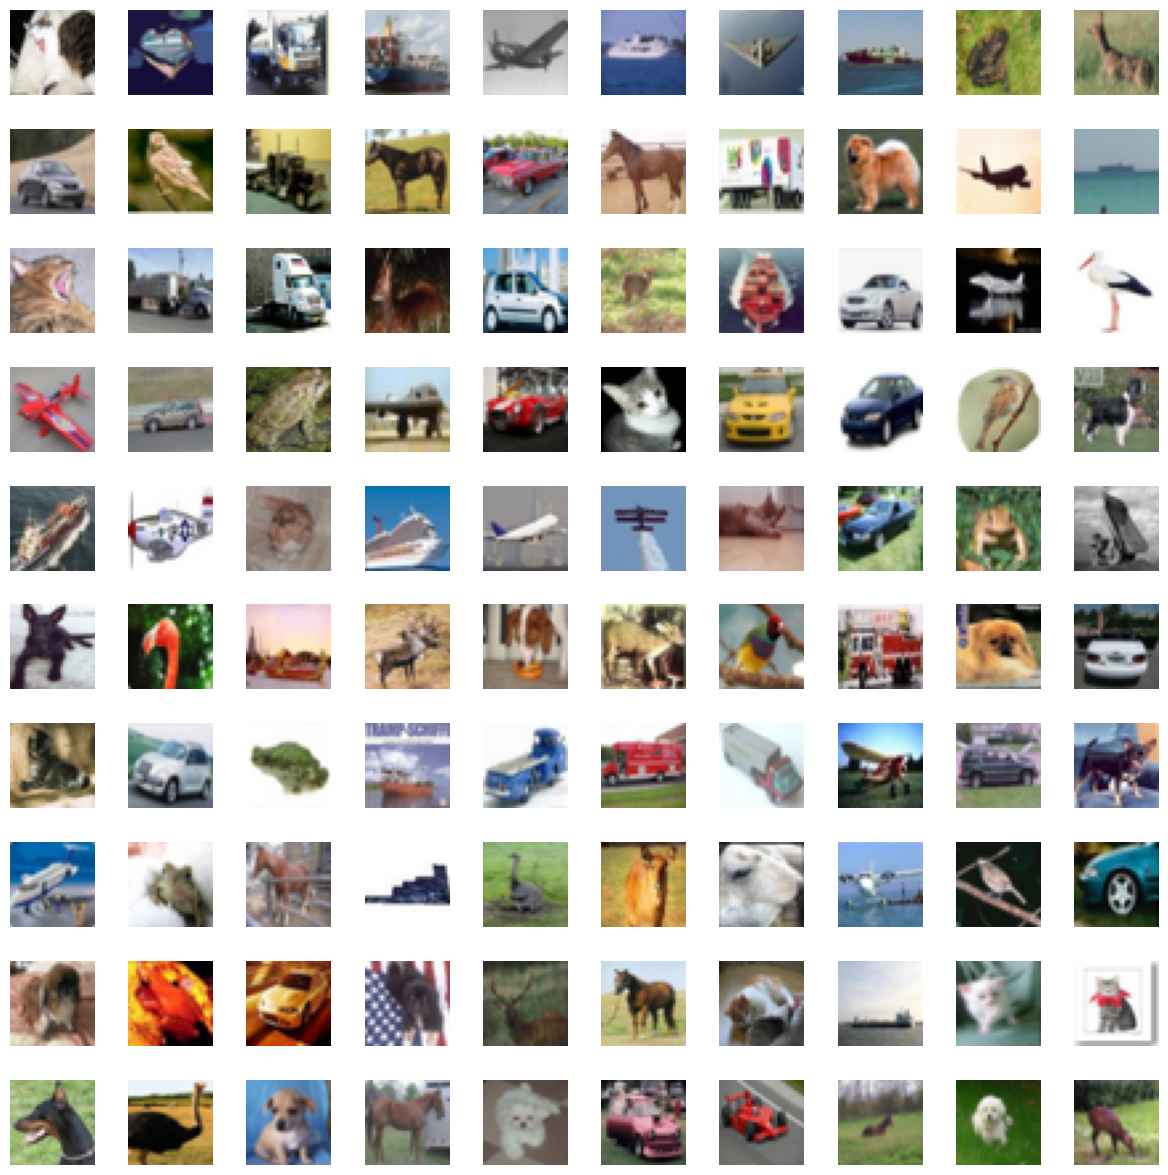

In [3]:
width = 10
height = 10

fig,axes = plt.subplots(height,width,figsize=(15,15))
axes = axes.ravel()


for i in np.arange(0,width*height):
    index = np.random.randint(0,50000)
    axes[i].imshow(X_train[index],cmap='gray')
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [4]:
X_train = X_train/255
X_test = X_test /255

In [24]:
autoencoder = Sequential()

# encoder
autoencoder.add(Conv2D(64,(3,3),activation='relu',input_shape=(32,32,3),padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D((2,2)))


autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D((2,2)))


autoencoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(MaxPooling2D((2,2)))




autoencoder.add(Conv2D(16,(3,3),activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))


autoencoder.add(Conv2D(32,(3,3),activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))

autoencoder.add(Conv2D(64,(3,3),activation='relu',padding='same'))
autoencoder.add(BatchNormalization())
autoencoder.add(UpSampling2D((2,2)))


autoencoder.add(Conv2D(3,(3,3),activation='sigmoid',padding='same'))


autoencoder.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 8, 8, 16)            │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 4, 4, 16)            │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 4, 4, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_3 (UpSampling2D)       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 8, 8, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 32)            │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_4 (UpSampling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_5 (UpSampling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 52,963 (206.89 KB)

 Trainable params: 52,515 (205.14 KB)

 Non-trainable params: 448 (1.75 KB)

In [25]:
autoencoder.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
autoencoder.fit(X_train,X_train,epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - accuracy: 0.5881 - loss: 0.5999
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7011 - loss: 0.5740
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7164 - loss: 0.5710
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7260 - loss: 0.5689
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7362 - loss: 0.5677
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7381 - loss: 0.5670
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7430 - loss: 0.5660
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7452 - loss: 0.5653
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7461 - loss: 0.5651
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.7470 - loss: 0.5656


In [27]:
encoder = Model(inputs=autoencoder.input,outputs=autoencoder.get_layer('max_pooling2d_2').output)

ValueError: The layer sequential_2 has never been called and thus has no defined input.

In [15]:
coded_images = encoder.predict(X_test)

NameError: name 'encoder' is not defined

In [16]:
decoded_images = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


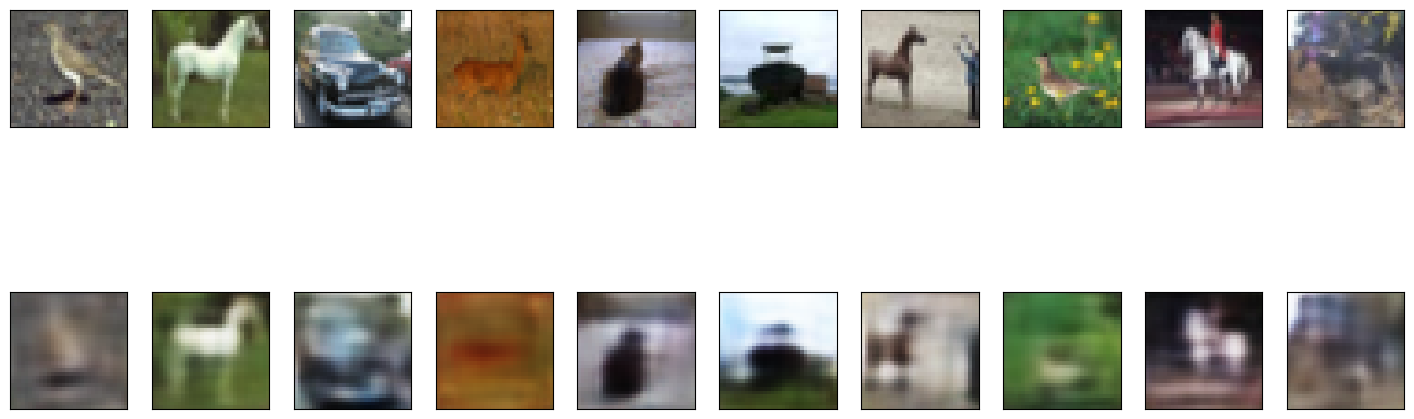

In [18]:
n_images = 10
test_images = np.random.randint(0,X_test.shape[0],size=n_images)
plt.figure(figsize=(18,18))

for i,image_index in enumerate(test_images):
    ax = plt.subplot(10,10,i+1)
    plt.imshow(X_test[image_index].reshape(32,32,3))
    plt.xticks(())
    plt.yticks(())

    # ax = plt.subplot(10,10,i+1+n_images)
    # plt.imshow(coded_test_images[image_index].reshape(16,8),cmap='gray')
    # plt.xticks(())
    # plt.yticks(())

    ax = plt.subplot(10,10,i+1+n_images+10)
    plt.imshow(decoded_images[image_index])
    plt.xticks(())
    plt.yticks(())